In [3]:
import tensorflow as tf
from tensorflow import keras

In [4]:
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

# Let’s load the data

In [5]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# map the images into classes

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Exploring the data

In [7]:
train_images.shape
#Each Label is between 0-9
train_labels
test_images.shape

(10000, 28, 28)

# pre-process the data.

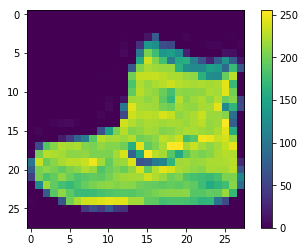

In [8]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()
#If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255.

# scale the images from 0–1 to feed it into the Neural Network

In [9]:
train_images = train_images / 255.0
test_images = test_images / 255.0

# Let’s display images.

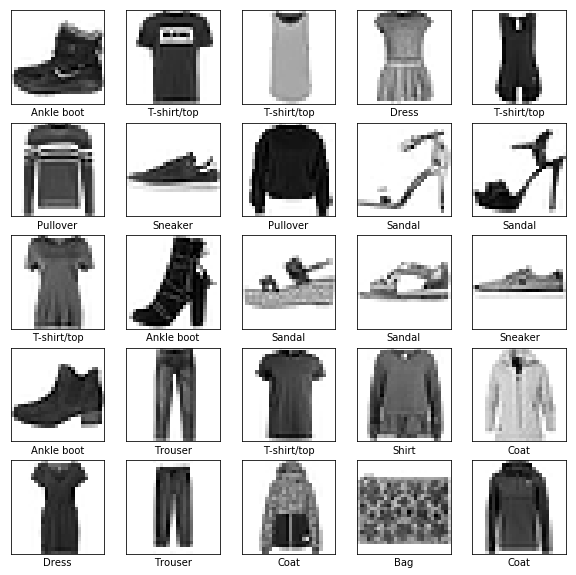

In [10]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# Setup the layers

In [11]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

Instructions for updating:
Colocations handled automatically by placer.


# Compile the Model

In [12]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Model Training

In [13]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 8s 135us/sample - loss: 0.4979 - acc: 0.8247
Epoch 2/10
60000/60000 [==============================] - 7s 112us/sample - loss: 0.3718 - acc: 0.8665
Epoch 3/10
60000/60000 [==============================] - 6s 107us/sample - loss: 0.3361 - acc: 0.8781
Epoch 4/10
60000/60000 [==============================] - 6s 94us/sample - loss: 0.3113 - acc: 0.8857
Epoch 5/10
60000/60000 [==============================] - 6s 95us/sample - loss: 0.2940 - acc: 0.8930
Epoch 6/10
60000/60000 [==============================] - 6s 94us/sample - loss: 0.2807 - acc: 0.8964
Epoch 7/10
60000/60000 [==============================] - 6s 95us/sample - loss: 0.2693 - acc: 0.9004
Epoch 8/10
60000/60000 [==============================] - 6s 95us/sample - loss: 0.2586 - acc: 0.9052
Epoch 9/10
60000/60000 [==============================] - 6s 94us/sample - loss: 0.2477 - acc: 0.9074
Epoch 10/10
60000/60000 [==============================] - 6s 94us/sample - los

# Evaluating Accuracy

In [14]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 39us/sample - loss: 0.3414 - acc: 0.8829
Test accuracy: 0.8829


# Making Predictions

In [15]:
predictions = model.predict(test_images)
predictions[0]

array([2.40750205e-06, 3.08085418e-10, 1.06523323e-09, 1.04648186e-10,
       4.12286116e-09, 1.03884639e-04, 3.80838756e-08, 1.77282598e-02,
       6.68799283e-09, 9.82165396e-01], dtype=float32)

In [16]:
np.argmax(predictions[0])
#Model is most confident that it's an ankle boot. Let's see if it's correct

9

In [17]:
test_labels[0]

9

# To look at the full set of 10 channels

In [18]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img, cmap=plt.cm.binary)
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'green'
  else:
    color = 'red'
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('green')

# look at the 0th and 10th image first

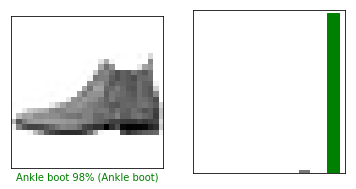

In [19]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

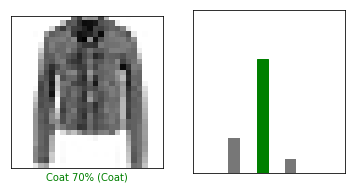

In [20]:
i = 10
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

# several images and their predictions. Correct ones are green, while the incorrect ones are red.

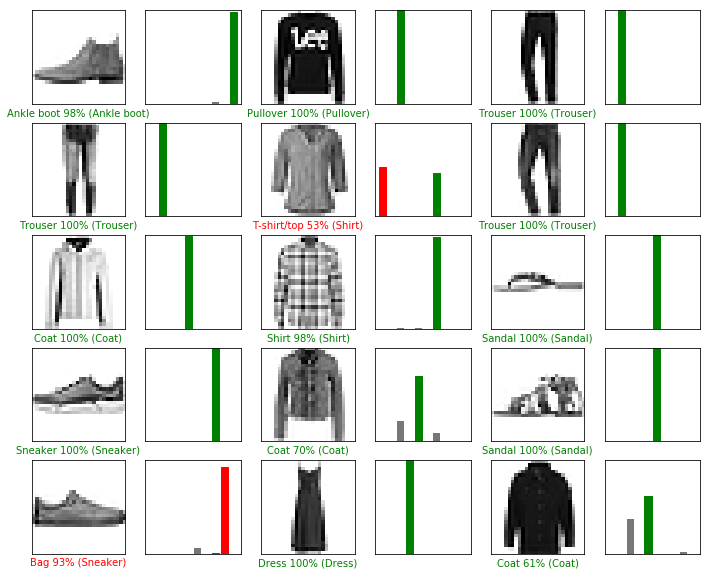

In [21]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

# Trained model to make a prediction about a single image.

In [22]:
# Grab an image from the test dataset
img = test_images[0]
print(img.shape)
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))
print(img.shape)
predictions_single = model.predict(img) 
print(predictions_single)

(28, 28)
(1, 28, 28)
[[2.40750660e-06 3.08086584e-10 1.06523534e-09 1.04648186e-10
  4.12287671e-09 1.03884842e-04 3.80839467e-08 1.77282840e-02
  6.68800615e-09 9.82165396e-01]]


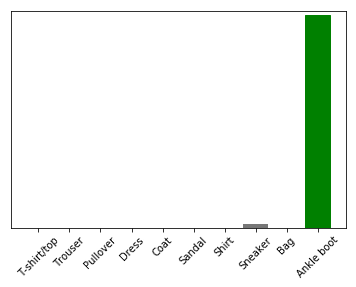

In [23]:
plot_value_array(0, predictions_single, test_labels)
plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [24]:
prediction_result = np.argmax(predictions_single[0])

In [25]:
prediction_result

9